In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
file = '/home/arthur/tmp/legal/abcnews-date-text.csv'
dft = pd.read_csv(file)[:200000]
dft['x'] = dft.headline_text.str.split(' ').apply(set).apply(list)
dft = dft.explode('x').reset_index()[['index', 'x']]
dft.columns = ['SessionId', 'ItemId']

In [88]:
def load_dataset_raw(path):
    file1 = '%s_train_full.txt' % path
    file2 = '%s_test.txt' % path
    d1 = pd.read_csv(file1, sep='\t')
    d2 = pd.read_csv(file2, sep='\t')
    return d1.append(d2)
    
df = load_dataset_raw('data/30music/raw/30music')
df2 = load_dataset_raw('data/nowplaying/single/nowplaying')

In [147]:
def plot_histograms(dfs, ds_names, xl):    
    fig, ax = plt.subplots(1, len(dfs), figsize=(18,5))
    for i, df in enumerate(dfs):
        dfx = df[['SessionId', 'ItemId']].drop_duplicates()
        
        #ax2 = ax[i].twinx()
        n, bins, patches = ax[i].hist(dfx.groupby('ItemId').count().SessionId, 
                                      log=True, bins=2000)
        #n, bins, patches = ax2.hist(dfx.groupby('ItemId').count().SessionId, density=True,
        #                               cumulative=1, histtype='step', 
        #                               bins=5000, color='tab:orange')
        if xl[i]:
            plt.xlim((0, xl[i]))
        ax[i].set_xscale('log')
        ax[i].set_xlabel('Document frequency (df)')
        ax[i].set_ylabel('# terms')
        plt.title(ds_names[i])
    plt.show()

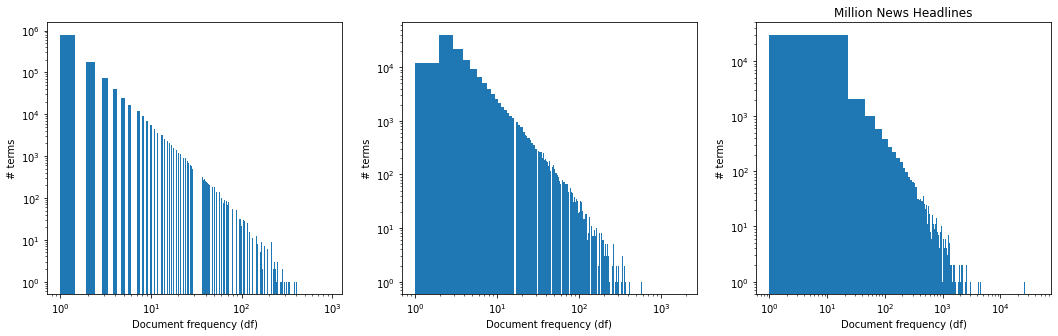

In [148]:
# Log scale distribution on document frequency
# of tokens with top negative feature importance.

xls = [None, None, None]
plot_histograms([df, df2, dft], ['30music', 'nowplaying', 'Million News Headlines'], xls)

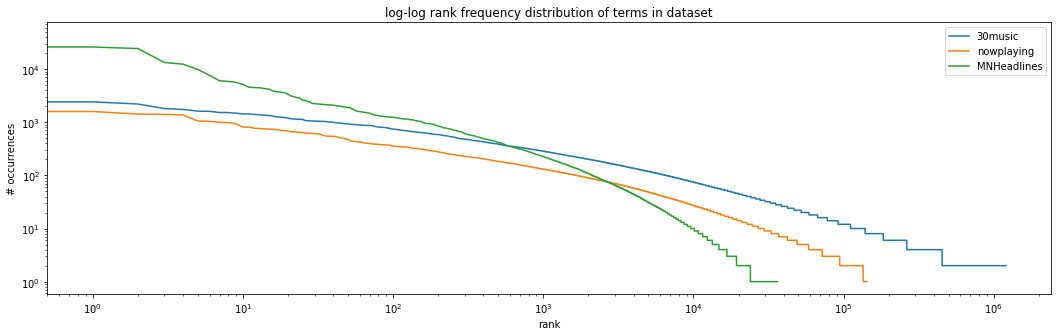

In [91]:
plt.figure(figsize=(18, 5))
plt.plot(df.groupby('ItemId').count().SessionId.sort_values(ascending=False).values, label='30music')
plt.plot(df2.groupby('ItemId').count().SessionId.sort_values(ascending=False).values, label='nowplaying')
plt.plot(dft.groupby('ItemId').count().SessionId.sort_values(ascending=False).values, label='MNHeadlines')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('rank')
plt.ylabel('# occurrences')
plt.title('log-log rank frequency distribution of terms in dataset')
plt.show()



In [125]:
dfx = df[['SessionId', 'ItemId']].drop_duplicates()
dfx.groupby('ItemId').count().SessionId

ItemId
7          1
8          1
18         1
20         1
22         1
          ..
5023072    1
5023095    1
5023096    1
5023104    1
5023107    1
Name: SessionId, Length: 1203432, dtype: int64

In [146]:
xx = dft[['SessionId', 'ItemId']].drop_duplicates().groupby('ItemId').count().sort_values('SessionId')
#np.log(len(xx)/1 + xx)
#len(dft)

,SessionId
ItemId,
kivilevs,10.496068
kiplagat,10.496068
kippa,10.496068
kippax,10.496068
kipping,10.496068
...,...
of,10.790246
on,10.810051
in,11.011241
